In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess

In [86]:
df = pd.read_csv('datasets/covid_2020_2022.csv')
area = pd.read_csv('datasets/us-state-land-area.csv')
df

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,Population
0,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,AL,South,5025369,NaN
1,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,Under 1 year,NaN,1491.0,19.0,NaN,NaN,24.0,AL,South,5025369,NaN
2,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,1-4 years,NaN,344.0,13.0,NaN,NaN,19.0,AL,South,5025369,NaN
3,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,5-14 years,NaN,453.0,11.0,NaN,NaN,16.0,AL,South,5025369,NaN
4,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,15-24 years,46.0,2672.0,51.0,16.0,NaN,85.0,AL,South,5025369,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73435,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,45-54 years,0.0,11.0,NaN,0.0,0.0,NaN,WY,West,576844,581978.0
73436,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,55-64 years,NaN,25.0,NaN,NaN,0.0,NaN,WY,West,576844,581978.0
73437,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,65-74 years,NaN,35.0,NaN,NaN,NaN,NaN,WY,West,576844,581978.0
73438,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,75-84 years,NaN,48.0,NaN,NaN,NaN,NaN,WY,West,576844,581978.0


In [87]:
df.rename(columns={'State': 'state'}, inplace=True)
area = area.loc[:, ['state', 'land_area_sq_mi']].rename(columns={'land_area_sq_mi': 'land_area'}).iloc[0:51]
area

,state,land_area
0,Alaska,570640.95
1,Texas,261231.71
2,California,155779.22
3,Montana,145545.80
4,New Mexico,121298.15
5,Arizona,113594.08
6,Nevada,109781.18
7,Colorado,103641.89
8,Oregon,95988.01
9,Wyoming,97093.14


In [88]:
df = pd.merge(df, area,on='state', how='left')
df

,Start Date,End Date,Group,Year,Month,state,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,Population,land_area
0,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,AL,South,5025369,NaN,50645.33
1,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,Under 1 year,NaN,1491.0,19.0,NaN,NaN,24.0,AL,South,5025369,NaN,50645.33
2,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,1-4 years,NaN,344.0,13.0,NaN,NaN,19.0,AL,South,5025369,NaN,50645.33
3,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,5-14 years,NaN,453.0,11.0,NaN,NaN,16.0,AL,South,5025369,NaN,50645.33
4,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,15-24 years,46.0,2672.0,51.0,16.0,NaN,85.0,AL,South,5025369,NaN,50645.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73435,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,45-54 years,0.0,11.0,NaN,0.0,0.0,NaN,WY,West,576844,581978.0,97093.14
73436,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,55-64 years,NaN,25.0,NaN,NaN,0.0,NaN,WY,West,576844,581978.0,97093.14
73437,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,65-74 years,NaN,35.0,NaN,NaN,NaN,NaN,WY,West,576844,581978.0,97093.14
73438,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,75-84 years,NaN,48.0,NaN,NaN,NaN,NaN,WY,West,576844,581978.0,97093.14


In [89]:
df['density'] = df['Population'] / df['land_area']
df['death_density'] = df['Total Deaths'] / df['land_area']
df['covid_density'] = df['COVID-19 Deaths'] / df['land_area']
df = df.drop(columns=['State Code'])
df

,Start Date,End Date,Group,Year,Month,state,Sex,Age Group,COVID-19 Deaths,Total Deaths,...,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Region,estimate base,Population,land_area,density,death_density,covid_density
0,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,All Ages,21520.0,231602.0,...,7411.0,356.0,32038.0,South,5025369,NaN,50645.33,NaN,4.573018,0.424916
1,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,Under 1 year,NaN,1491.0,...,NaN,NaN,24.0,South,5025369,NaN,50645.33,NaN,0.029440,NaN
2,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,1-4 years,NaN,344.0,...,NaN,NaN,19.0,South,5025369,NaN,50645.33,NaN,0.006792,NaN
3,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,5-14 years,NaN,453.0,...,NaN,NaN,16.0,South,5025369,NaN,50645.33,NaN,0.008945,NaN
4,01/01/2020,09/23/2023,By Total,0,0,Alabama,All Sexes,15-24 years,46.0,2672.0,...,16.0,NaN,85.0,South,5025369,NaN,50645.33,NaN,0.052759,0.000908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73435,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,45-54 years,0.0,11.0,...,0.0,0.0,NaN,West,576844,581978.0,97093.14,5.994018,0.000113,0.000000
73436,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,55-64 years,NaN,25.0,...,NaN,0.0,NaN,West,576844,581978.0,97093.14,5.994018,0.000257,NaN
73437,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,65-74 years,NaN,35.0,...,NaN,NaN,NaN,West,576844,581978.0,97093.14,5.994018,0.000360,NaN
73438,12/01/2022,12/31/2022,By Month,2022,12,Wyoming,Female,75-84 years,NaN,48.0,...,NaN,NaN,NaN,West,576844,581978.0,97093.14,5.994018,0.000494,NaN


In [90]:
df['Group'].unique()

array(['By Total', 'By Year', 'By Month'], dtype=object)

# Find Correlation

In [91]:
df_allSex_allAges = df[(df['Sex'] == 'All Sexes') & (df['Age Group'] == 'All Ages') & (df['Group'] == 'By Year')]
df_allSex_allAges

,Start Date,End Date,Group,Year,Month,state,Sex,Age Group,COVID-19 Deaths,Total Deaths,...,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Region,estimate base,Population,land_area,density,death_density,covid_density
1836,01/01/2020,12/31/2020,By Year,2020,0,Alabama,All Sexes,All Ages,6706.0,63362.0,...,2177.0,140.0,9870.0,South,5025369,5033094.0,50645.33,99.379232,1.251093,0.132411
1872,01/01/2021,12/31/2021,By Year,2021,0,Alabama,All Sexes,All Ages,9719.0,67323.0,...,3604.0,36.0,12496.0,South,5025369,5049196.0,50645.33,99.697169,1.329303,0.191903
1908,01/01/2022,12/31/2022,By Year,2022,0,Alabama,All Sexes,All Ages,4226.0,61127.0,...,1349.0,132.0,6931.0,South,5025369,5076181.0,50645.33,100.229992,1.206962,0.083443
1944,01/01/2020,12/31/2020,By Year,2020,0,Alaska,All Sexes,All Ages,254.0,5008.0,...,142.0,10.0,434.0,West,733395,733017.0,570640.95,1.284550,0.008776,0.000445
1980,01/01/2021,12/31/2021,By Year,2021,0,Alaska,All Sexes,All Ages,839.0,6075.0,...,502.0,NaN,1005.0,West,733395,734420.0,570640.95,1.287009,0.010646,0.001470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164,01/01/2021,12/31/2021,By Year,2021,0,Wisconsin,All Sexes,All Ages,6076.0,60807.0,...,2472.0,13.0,8287.0,Midwest,5894170,5881608.0,54157.80,108.601310,1.122775,0.112191
7200,01/01/2022,12/31/2022,By Year,2022,0,Wisconsin,All Sexes,All Ages,3912.0,60282.0,...,1310.0,153.0,6310.0,Midwest,5894170,5903975.0,54157.80,109.014306,1.113081,0.072233
7236,01/01/2020,12/31/2020,By Year,2020,0,Wyoming,All Sexes,All Ages,461.0,5527.0,...,198.0,10.0,748.0,West,576844,577681.0,97093.14,5.949761,0.056925,0.004748
7272,01/01/2021,12/31/2021,By Year,2021,0,Wyoming,All Sexes,All Ages,963.0,5962.0,...,582.0,NaN,1191.0,West,576844,579636.0,97093.14,5.969897,0.061405,0.009918


In [92]:
death_rate = (df_allSex_allAges.groupby(['state', 'Year','Age Group'],observed=False)['death_density'].sum() /
    df_allSex_allAges.groupby(['state', 'Year','Age Group'],observed=False)['density'].sum() 
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')
print('Total Deaths')
print(death_rate)

Total Deaths
         state  Year Age Group  Death Rate (%)
0      Alabama  2020  All Ages        1.258908
1      Alabama  2021  All Ages        1.333341
2      Alabama  2022  All Ages        1.204193
3       Alaska  2020  All Ages        0.683204
4       Alaska  2021  All Ages        0.827183
..         ...   ...       ...             ...
148  Wisconsin  2021  All Ages        1.033850
149  Wisconsin  2022  All Ages        1.021041
150    Wyoming  2020  All Ages        0.956756
151    Wyoming  2021  All Ages        1.028577
152    Wyoming  2022  All Ages        0.937321

[153 rows x 4 columns]


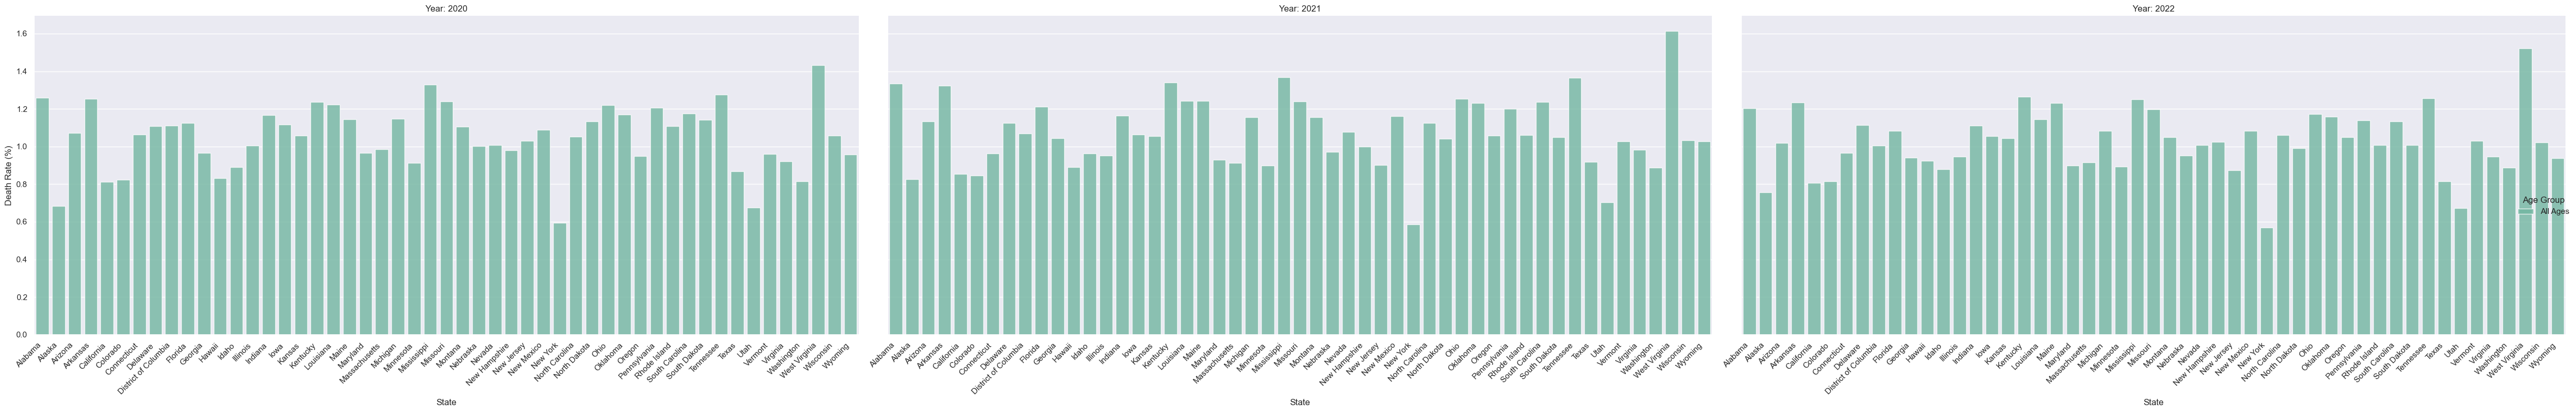

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and adjust the aspect ratio for larger plots
g = sns.FacetGrid(
    data=death_rate,
    col="Year",
    hue="Age Group",
    height=8,  # Increase height for larger plots
    aspect=2,  # Increase aspect ratio for wider plots
    palette="Set2"
)

# Create a bar plot for each year with separated bars for each Age Group
g.map(
    sns.barplot,
    "state",
    "Death Rate (%)",
    alpha=0.8,
    dodge=True,  # Separate the bars for each Age Group
    order=death_rate['state'].unique()
)

# Customize the plot
g.set_titles("Year: {col_name}")
g.set_axis_labels("State", "Death Rate (%)")
g.set_xticklabels(rotation=45, ha='right')
g.add_legend(title="Age Group")

# Adjust layout to prevent cutting off elements
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
death_rate = (df_allSex_allAges.groupby(['state', 'Year','Age Group'],observed=False)['covid_density'].sum() /
    df_allSex_allAges.groupby(['state', 'Year','Age Group'],observed=False)['density'].sum() 
) * 100

death_rate = death_rate.reset_index(name='Death Rate (%)')
print('Total Deaths')
print(death_rate)

Total Deaths
         state  Year Age Group  Death Rate (%)
0      Alabama  2020  All Ages        0.133238
1      Alabama  2021  All Ages        0.192486
2      Alabama  2022  All Ages        0.083252
3       Alaska  2020  All Ages        0.034651
4       Alaska  2021  All Ages        0.114240
..         ...   ...       ...             ...
148  Wisconsin  2021  All Ages        0.103305
149  Wisconsin  2022  All Ages        0.066260
150    Wyoming  2020  All Ages        0.079802
151    Wyoming  2021  All Ages        0.166139
152    Wyoming  2022  All Ages        0.060655

[153 rows x 4 columns]


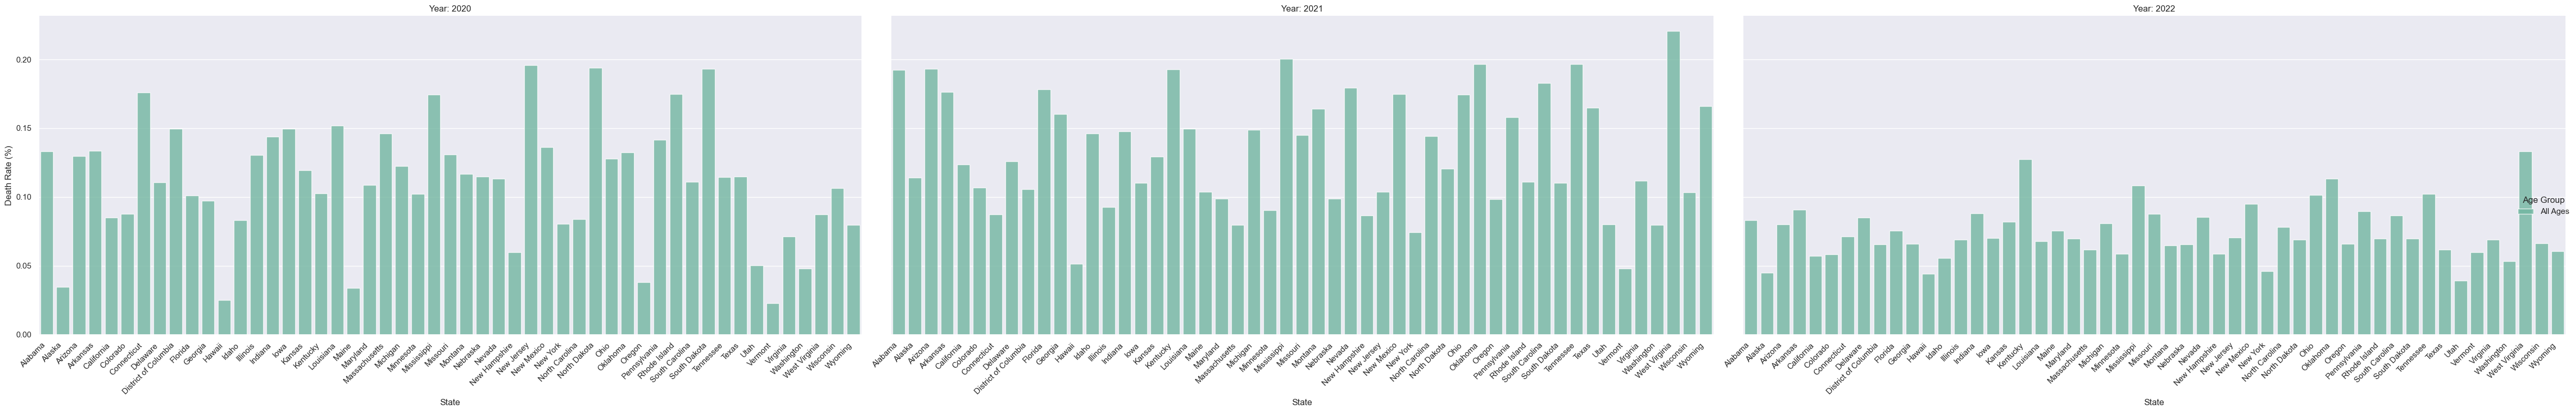

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and adjust the aspect ratio for larger plots
g = sns.FacetGrid(
    data=death_rate,
    col="Year",
    hue="Age Group",
    height=8,  # Increase height for larger plots
    aspect=2,  # Increase aspect ratio for wider plots
    palette="Set2"
)

# Create a bar plot for each year with separated bars for each Age Group
g.map(
    sns.barplot,
    "state",
    "Death Rate (%)",
    alpha=0.8,
    dodge=True,  # Separate the bars for each Age Group
    order=death_rate['state'].unique()
)

# Customize the plot
g.set_titles("Year: {col_name}")
g.set_axis_labels("State", "Death Rate (%)")
g.set_xticklabels(rotation=45, ha='right')
g.add_legend(title="Age Group")

# Adjust layout to prevent cutting off elements
plt.tight_layout()

# Show the plot
plt.show()